In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_clusters_per_class=1, random_state=42)


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    cost = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return cost

In [6]:
def train_logistic_regression(X, y, learning_rate=0.1, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    costs = []

    for _ in range(epochs):
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)
        
        dw = (1 / m) * np.dot(X.T, (y_hat - y))
        db = (1 / m) * np.sum(y_hat - y)
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        costs.append(cost_function(X, y, w, b))

    return w, b, costs


In [7]:
w, b, costs = train_logistic_regression(X, y)


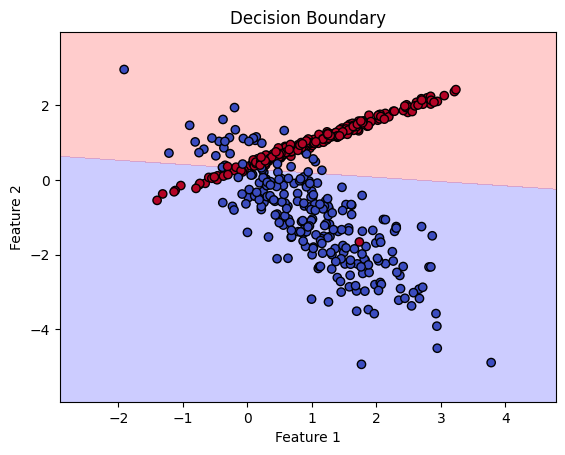

In [8]:
def plot_decision_boundary(X, y, w, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = sigmoid(w[0] * xx + w[1] * yy + b)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, w, b)


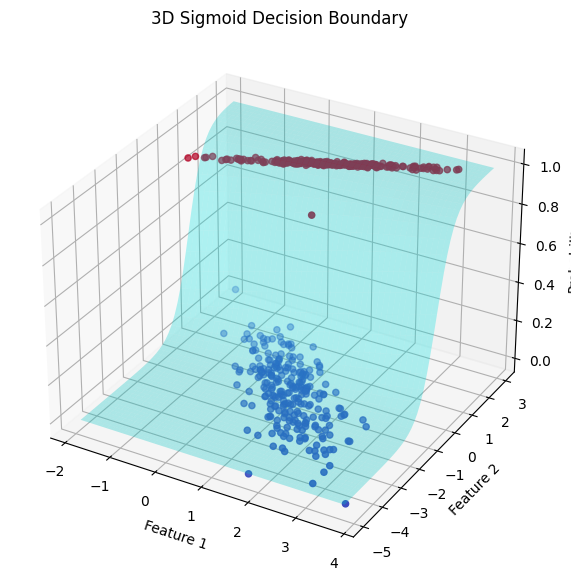

In [9]:
def plot_3d_decision_boundary(X, y, w, b):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm')

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
    zz = sigmoid(w[0] * xx + w[1] * yy + b)

    ax.plot_surface(xx, yy, zz, color='cyan', alpha=0.3)
    
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Probability")
    ax.set_title("3D Sigmoid Decision Boundary")
    plt.show()

plot_3d_decision_boundary(X, y, w, b)


In [10]:
def predict(X, w, b):
    return (sigmoid(np.dot(X, w) + b) >= 0.5).astype(int)

sample = np.array([[0.5, -1]])
prediction = predict(sample, w, b)
print(f"Predicted class for {sample}: {prediction}")


Predicted class for [[ 0.5 -1. ]]: [0]


In [13]:
import imageio

# Create GIF Frames
filenames = []
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
zz = sigmoid(w[0] * xx + w[1] * yy + b)

for angle in range(0, 360, 5):  # Rotate from 0 to 360 degrees
    ax.clear()
    ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm')
    ax.plot_surface(xx, yy, zz, color='cyan', alpha=0.3)

    ax.view_init(30, angle)  # Rotate view
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Probability")
    ax.set_title("3D Sigmoid Decision Boundary")

    filename = f"frame_{angle}.png"
    plt.savefig(filename)
    filenames.append(filename)

plt.close()

# Create GIF
gif_filename = "logistic_regression_decision_boundary.gif"
with imageio.get_writer(gif_filename, mode='I', duration=0.1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f"GIF saved as {gif_filename}")

C:\Users\sunny\AppData\Local\Temp\ipykernel_12624\4134670056.py:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved as logistic_regression_decision_boundary.gif
